In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Transformed_Housing_Data")

In [3]:
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [4]:
data["Mean_Sales"]=data["Sale Price"].mean()

In [5]:
data["Mean_Sales"].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: Mean_Sales, dtype: float64

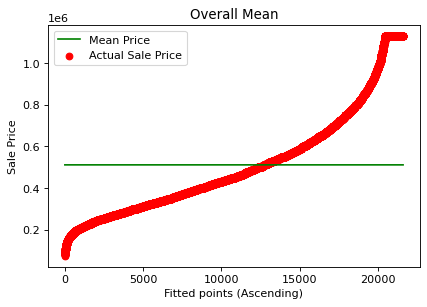

In [6]:
plt.figure(dpi=80)
k=range(0,len(data))
plt.scatter(k,data['Sale Price'].sort_values(),color='red',label='Actual Sale Price')
plt.plot(k,data['Mean_Sales'].sort_values(),color='green',label='Mean Price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title("Overall Mean")
plt.legend()

In [7]:
data['Overall Grade'].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [11]:
grades_mean = data.pivot_table(values='Sale Price',columns='Overall Grade', aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [12]:
# making a new column
data['grade mean']=0
for i in grades_mean.columns:
    data['grade mean'][data['Overall Grade']==i] = grades_mean[i][0]
    
data['grade mean'].head()

<ipython-input-12-132518ad7a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade mean'][data['Overall Grade']==i] = grades_mean[i][0]
<ipython-input-12-132518ad7a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['grade mean'][data['Overall Grade']==i] = grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade mean, dtype: float64

In [22]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [25]:
data.head(10)

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation,Mean_Sales,grade mean
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0,511618.558147,402239.619779
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26,511618.558147,402239.619779
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0,511618.558147,301882.014720
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0,511618.558147,402239.619779
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0,511618.558147,537584.082097
5,7237550310,1129575.0,4,4.50,5420.0,101930.0,1.0,No,0,Fair,10,3890.0,1530,17,98053.0,47.6561,-122.005,4760.0,101930,No,0,511618.558147,960408.078866
6,1321400060,257500.0,3,2.25,1715.0,6819.0,2.0,No,0,Fair,7,1715.0,0,23,98003.0,47.3097,-122.327,2238.0,6819,No,0,511618.558147,402239.619779
7,2008000270,291850.0,3,1.50,1060.0,9711.0,1.0,No,0,Fair,7,1060.0,0,55,98198.0,47.4095,-122.315,1650.0,9711,No,0,511618.558147,402239.619779
8,2414600126,229500.0,3,1.00,1780.0,7470.0,1.0,No,0,Fair,7,1050.0,730,58,98146.0,47.5123,-122.337,1780.0,8113,No,0,511618.558147,402239.619779
9,3793500160,323000.0,3,2.50,1890.0,6560.0,2.0,No,0,Fair,7,1890.0,0,15,98038.0,47.3684,-122.031,2390.0,7570,No,0,511618.558147,402239.619779


In [27]:
gradewise_list=[]
for i in range(1,11):
    k=data['Sale Price'][data["Overall Grade"]==i]
    gradewise_list.append(k)
    
classwise_list=[]
for i in range(1,11):
    k=data['Sale Price'][data['Overall Grade']==i]
    classwise_list.append(k)    

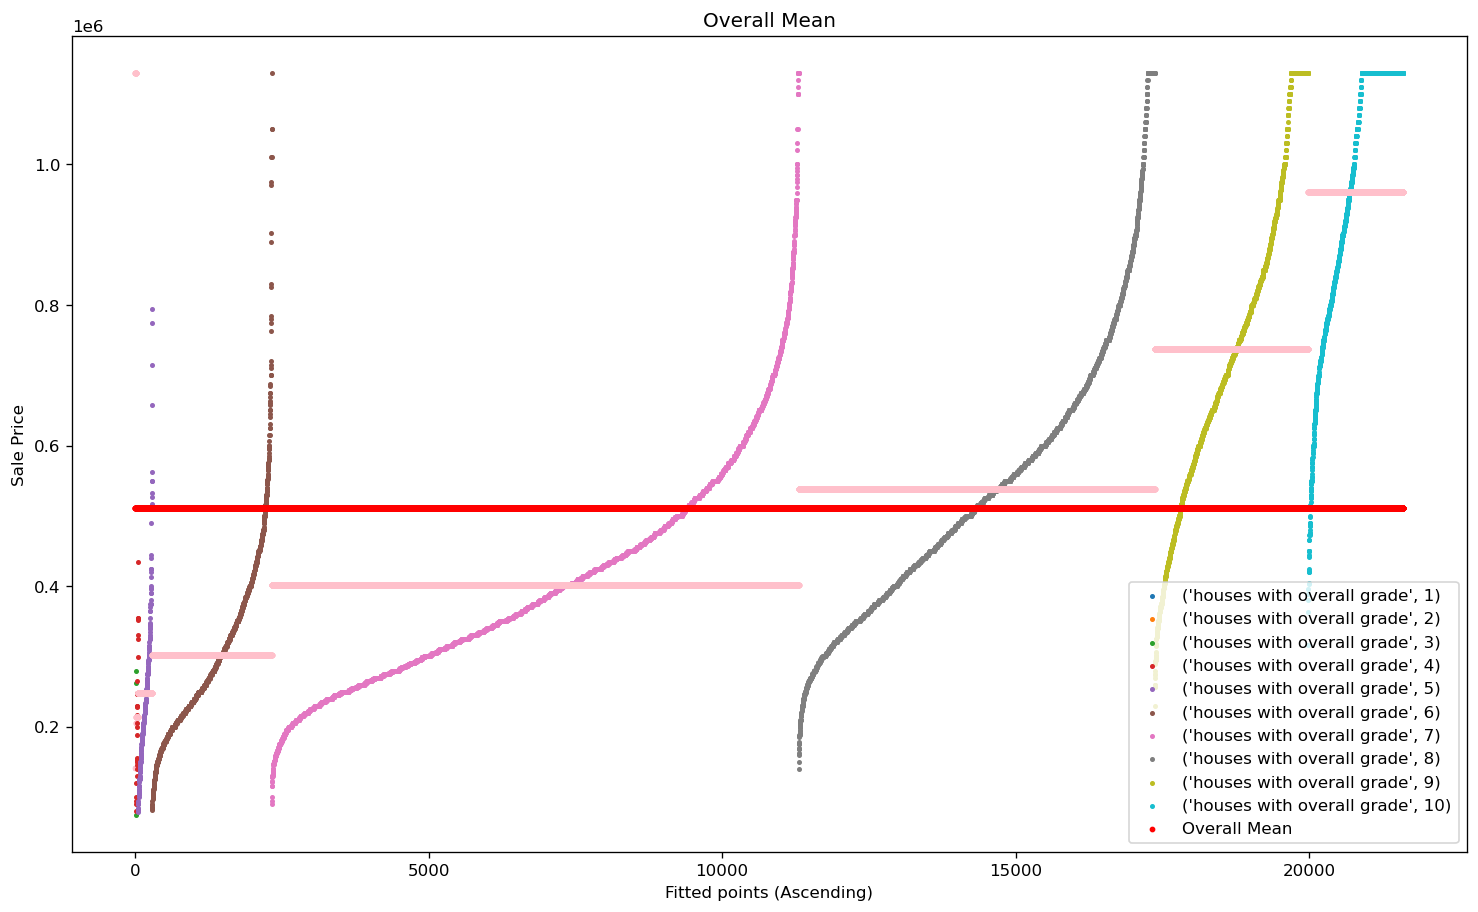

In [35]:
plt.figure(dpi=120,figsize=(15,9))

z=0
for i in range(1,11):
    points = [k for k in range(z,z+ len(classwise_list[i-1]))]
    
    plt.scatter(points,classwise_list[i-1].sort_values(),
               label=("houses with overall grade",i), s=4)
    
    plt.scatter(points,
                [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
                s=6,color='pink'
               )
    z= max(points)+1
    
plt.scatter([q for q in range(0,z)],
           data['Mean_Sales'],
           color='red',
           label='Overall Mean',
           s=6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel('Sale Price')
plt.title('Overall Mean')
plt.legend(loc=4)

In [36]:
# Residual plot: scatter plot of difference between prediction and actual
# Residual = Prediction - Actual

In [38]:
mean_difference = data['Mean_Sales']-data['Sale Price']  # model 1
grade_mean_difference = data['grade mean']- data['Sale Price']  # model 2

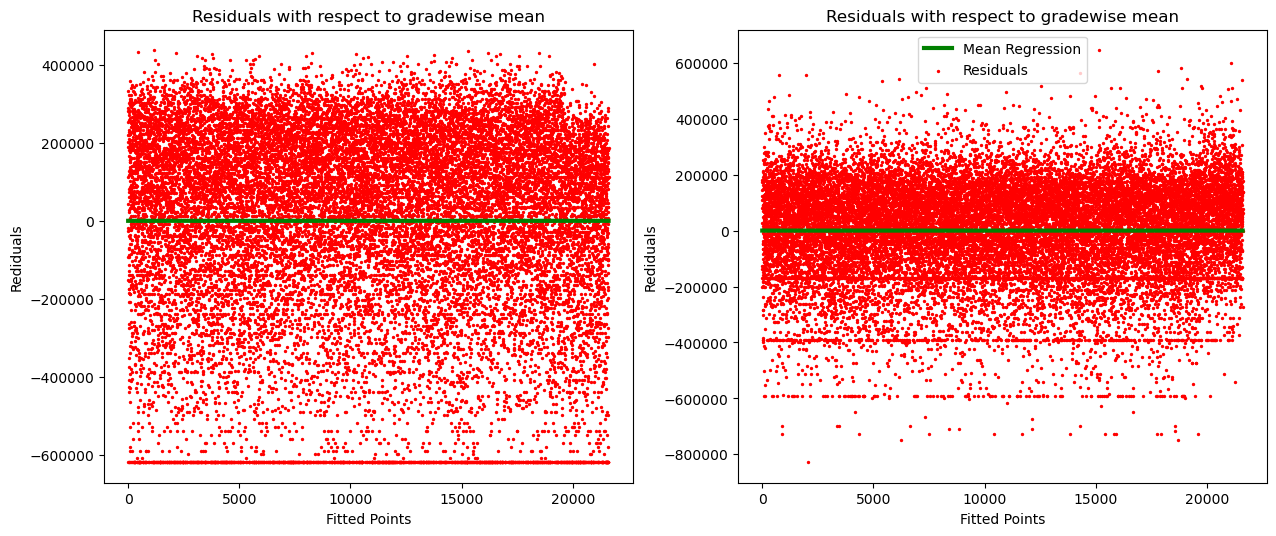

In [40]:
k = range(0,len(data))
l=[0 for i in range(len(data))]

plt.figure(figsize=(15,6), dpi=100)

plt.subplot(1,2,1)
plt.scatter(k,mean_difference, color='red', label ='Residuals', s=2)
plt.plot(k,l,color = 'green', label='Mean Regression', linewidth=3)
plt.xlabel('Fitted Points')
plt.ylabel('Rediduals')
plt.title("Residuals with respect to gradewise mean")

plt.subplot(1,2,2)
plt.scatter(k,grade_mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='Mean Regression', linewidth=3)
plt.xlabel('Fitted Points')
plt.ylabel('Rediduals')
plt.title("Residuals with respect to gradewise mean")

plt.legend()

In [41]:
# model 2 results better than mode 1 as it is closer to the zero line(green)
# mean regression based on a categorical feature will give better results

In [42]:
# mean error = (error term 1+ error term 2+ ...)/Total number of data points

In [46]:
cost = sum(mean_difference)/len(data)
print(cost)

1.895260187332686e-09


### Mean Absolute Error or MAE

MAE: tells us how far, on an average, the actual point is expected to lie from the predicted point

Take the absolute value of each individual error term, sum it up for all data points and then take a mean

* Y^ : predicted values
* Y  : actuual values
* n  : total no. of data points.

residual term ----------> Y^-Y

In [49]:
Y= data["Sale Price"]
Y_hat1 = data["Mean_Sales"]
Y_hat2 = data["grade mean"]
n= len(data)

len(Y),len(Y_hat1),len(Y_hat2),n

(21609, 21609, 21609, 21609)

In [50]:
cost_mean = sum(abs(Y_hat1-Y))/n

In [51]:
cost_mean

199168.78146839526

In [52]:
cost_grade_mean = sum(abs(Y_hat2-Y))/n
cost_grade_mean

137081.70298203363

In [53]:
# model 2 is better than model 1

In [55]:
#using sklearn to calculate MAE
from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2,Y)
cost_grade_mean

137081.7029820291

#####  Mean Squared Error , MSE
square the individual errors,sum the up, and then take a mean of it.

* tells about the presence or absence of large errors

In [56]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)
cost_grade_mean = mean_squared_error(Y_hat2,Y)

cost_mean,cost_grade_mean

(62528116847.799576, 30804835720.342426)

##### Root Mean Squared Error, RMSE
* tells about the presence or absence of large errors
* Gives the expected average distance between the actual and predicted points

calculate square of MSE

In [57]:
from sklearn.metrics import mean_squared_error
cost_mean = mean_squared_error(Y_hat1,Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2,Y)**0.5

cost_mean,cost_grade_mean

(250056.2273725643, 175513.06424406826)

##### R square
It gives us the relative error of a regression model w.r.t the simple mean regression model

* Ybar : mean of 'Sale Price'
* Yhat : predicted values from a regression model
* Y  : actual ' Sale Price'

R^2 = 1-(sum(Yhat i-Yi)^2/sum(Ybar i-Yi)^2)

where, sum(Ybar i-Yi)^2 = n*MSE of simple mean model, and
sum(Yhat i-Yi)^2 = n*MSE of regression model we want to evaluate

R^2 = 1-(MSE(model)/MSE(mean))

(MSE(model)/MSE(mean)), the lover value, the better the model is.

if (Yhat i-Yi) =0, R_square=1-0=1 ----> perfect model

For any model better than mean prediction model but not perfect model, 
0 < R_square < 1
or 
0% < R_square < 100%

in reality, 
-infi < R_square < 1


In [58]:
Y=data['Sale Price']
Y_bar = data['Mean_Sales']
Y_hat = data['grade mean']
n= len(data)

len(Y),len(Y_hat),len(Y_bar),n

(21609, 21609, 21609, 21609)

In [61]:
mse_mean = mean_squared_error(Y_bar,Y)
mse_model = mean_squared_error(Y_hat,Y)
mse_mean,mse_model

(62528116847.799576, 30804835720.342426)

In [62]:
R2 = 1-(mse_model/mse_mean)

In [63]:
R2

0.5073442592981836

R_square: The degree to which your input variables explain the variation of your target or output variable

The higher the R_square is, the more is the variation explained by the input variables and hence better the model

* popular evaluation metric
* gives a measure of model error or model performance in % terms

drawback: it will either stay the same or increase with the addition of more variables, even if they do not have any relationship with the output variables

##### Adjusted R_square :
It penalizes the result for adding variables which do not improve the existing model